In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "piemonte"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,1,Piemonte,2,0,2,1,3,0,0,...,0.0,0.0,0.0,0.0,0.00,66.67,0.00,0.00,0.00,0.000
1,2020-02-26T18:00:00,1,Piemonte,2,0,2,1,3,0,0,...,0.0,15.0,0.0,0.0,0.00,66.67,0.00,0.00,0.00,0.000
2,2020-02-27T18:00:00,1,Piemonte,2,0,2,0,2,-1,-1,...,0.0,0.0,0.0,-1.0,0.00,100.00,-inf,0.00,0.00,-33.333
3,2020-02-28T18:00:00,1,Piemonte,7,0,7,4,11,9,9,...,0.0,71.0,0.0,4.0,0.00,63.64,12.68,0.00,0.00,450.000
4,2020-02-29T17:00:00,1,Piemonte,7,0,7,4,11,0,0,...,0.0,81.0,0.0,0.0,0.00,63.64,0.00,0.00,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2020-11-18T17:00:00,1,Piemonte,5208,388,5596,69468,75064,1278,3281,...,63.0,17755.0,10445.0,1216.0,6.93,7.45,18.48,31.41,1.04,4.447
268,2020-11-19T17:00:00,1,Piemonte,5147,390,5537,71700,77237,2173,5349,...,78.0,41876.0,28547.0,2232.0,7.04,7.17,12.77,18.74,0.52,7.126
269,2020-11-20T17:00:00,1,Piemonte,5225,393,5618,70927,76545,-692,3861,...,88.0,21513.0,9801.0,-773.0,7.00,7.34,17.95,39.39,0.77,4.999
270,2020-11-21T17:00:00,1,Piemonte,5150,390,5540,70552,76092,-453,2896,...,77.0,18889.0,15496.0,-375.0,7.04,7.28,15.33,18.69,-0.76,3.783


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 22, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 2641
Nuovi tamponi: 13605.0
Percentuale nuovi positivi/nuovi tamponi: 19.400000000000002 %
Nuovi guariti: 1652.0
Nuovi deceduti: 69.0
Variazione positivi ricoverati con sintomi: -18.0
Variazione positivi in terapia intensiva: 8.0
Variazione positivi in isolamento dimiciliare: 930.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 22, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-09-23T17:00:00,1,Piemonte,163,8,171,2247,2418,25,95,...,1.0,5620.0,2656.0,25.0,4.68,7.07,1.69,3.58,14.29,3.970
1,2020-09-24T17:00:00,1,Piemonte,165,9,174,2288,2462,44,104,...,1.0,6366.0,3548.0,41.0,5.17,7.07,1.63,2.93,12.50,4.301
2,2020-09-25T17:00:00,1,Piemonte,163,9,172,2330,2502,40,120,...,1.0,6284.0,2907.0,42.0,5.23,6.87,1.91,4.13,0.00,4.874
3,2020-09-26T17:00:00,1,Piemonte,164,10,174,2389,2563,61,107,...,1.0,5417.0,3386.0,59.0,5.75,6.79,1.98,3.16,11.11,4.277
4,2020-09-27T17:00:00,1,Piemonte,166,10,176,2457,2633,70,132,...,1.0,4274.0,3044.0,68.0,5.68,6.68,3.09,4.34,0.00,5.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-11-18T17:00:00,1,Piemonte,5208,388,5596,69468,75064,1278,3281,...,63.0,17755.0,10445.0,1216.0,6.93,7.45,18.48,31.41,1.04,4.447
57,2020-11-19T17:00:00,1,Piemonte,5147,390,5537,71700,77237,2173,5349,...,78.0,41876.0,28547.0,2232.0,7.04,7.17,12.77,18.74,0.52,7.126
58,2020-11-20T17:00:00,1,Piemonte,5225,393,5618,70927,76545,-692,3861,...,88.0,21513.0,9801.0,-773.0,7.00,7.34,17.95,39.39,0.77,4.999
59,2020-11-21T17:00:00,1,Piemonte,5150,390,5540,70552,76092,-453,2896,...,77.0,18889.0,15496.0,-375.0,7.04,7.28,15.33,18.69,-0.76,3.783


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

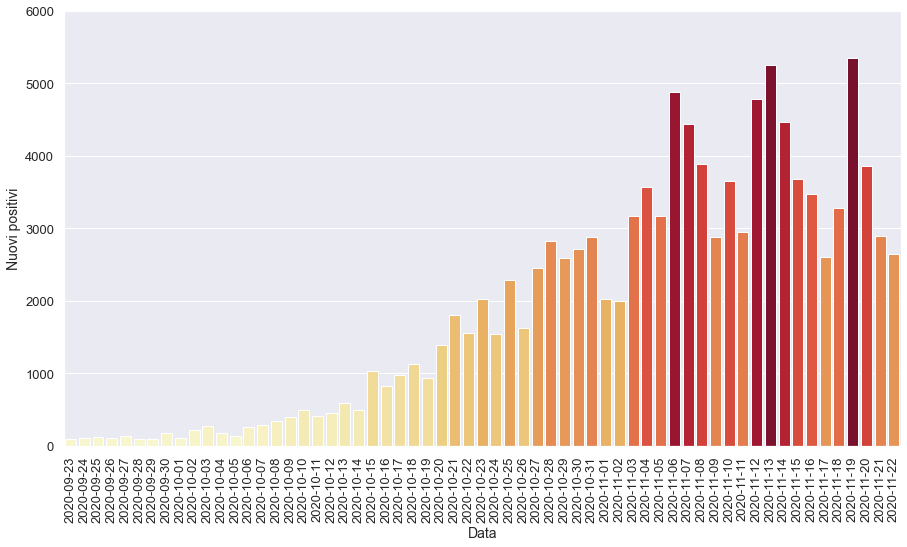

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

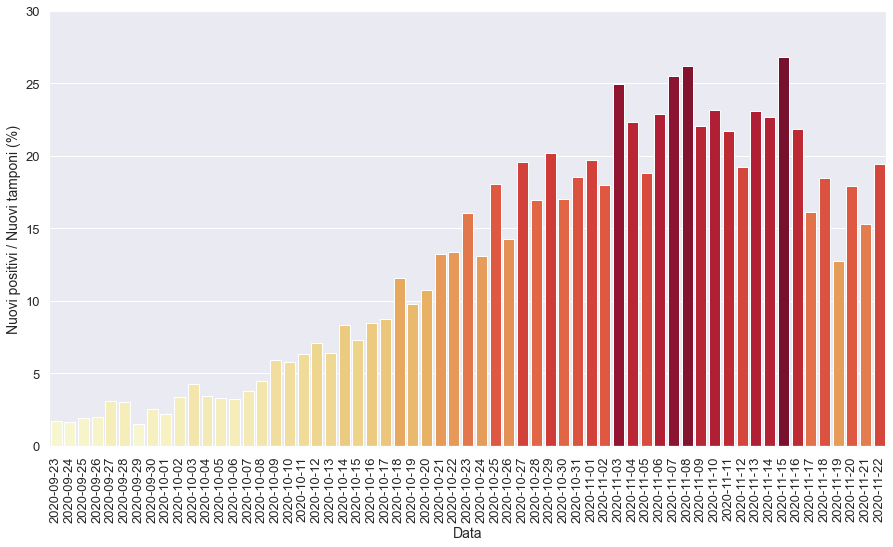

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

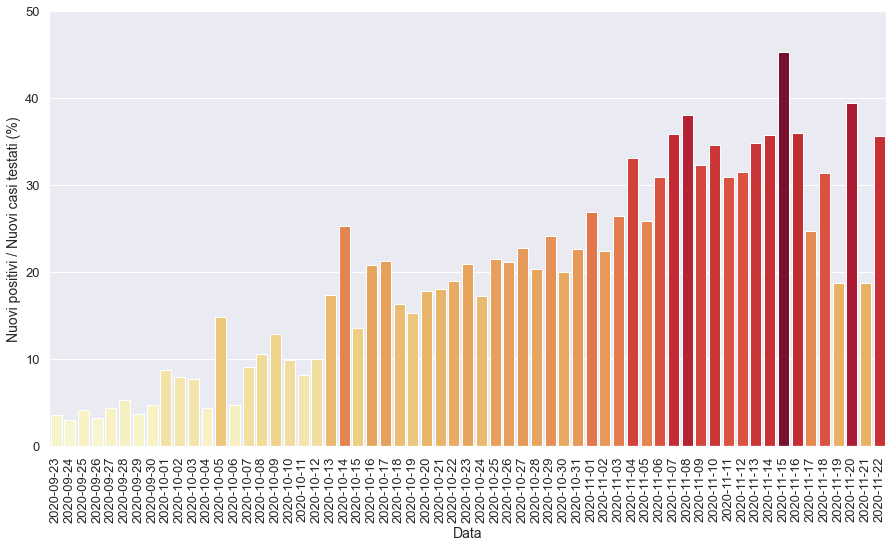

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

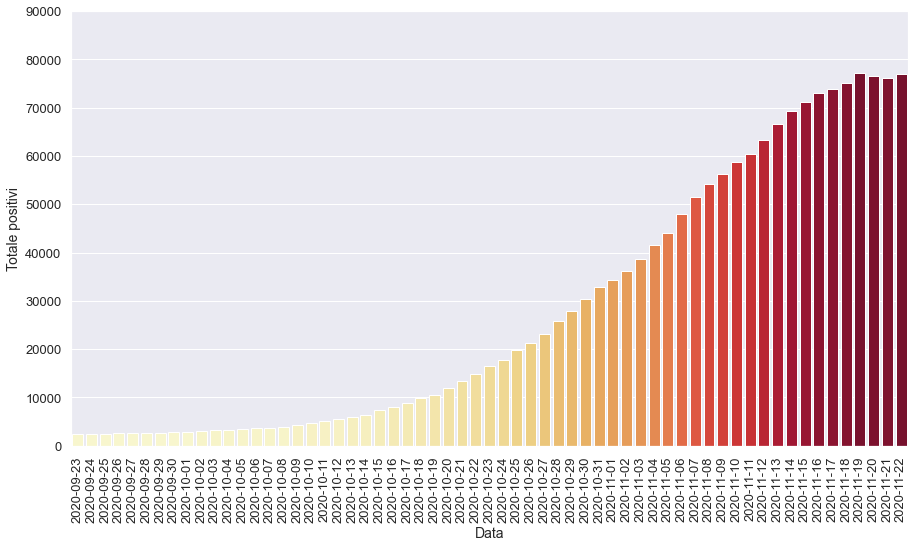

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

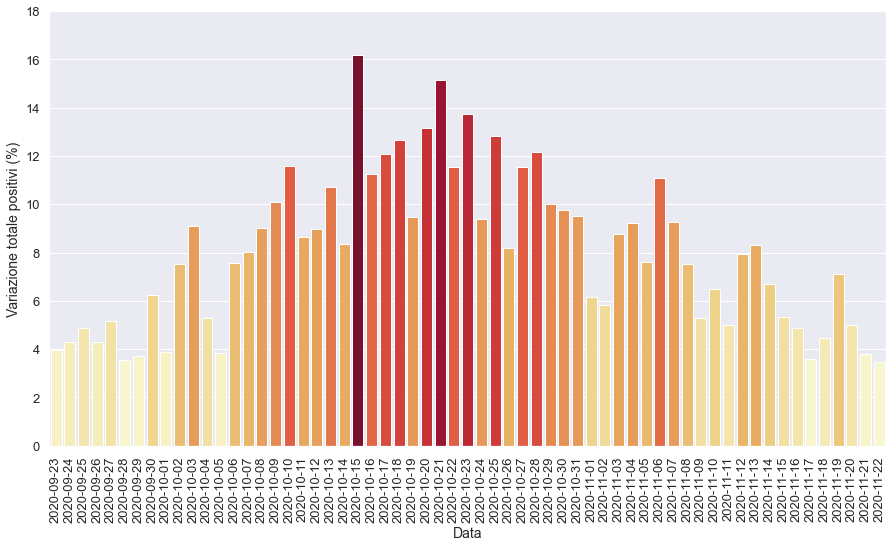

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

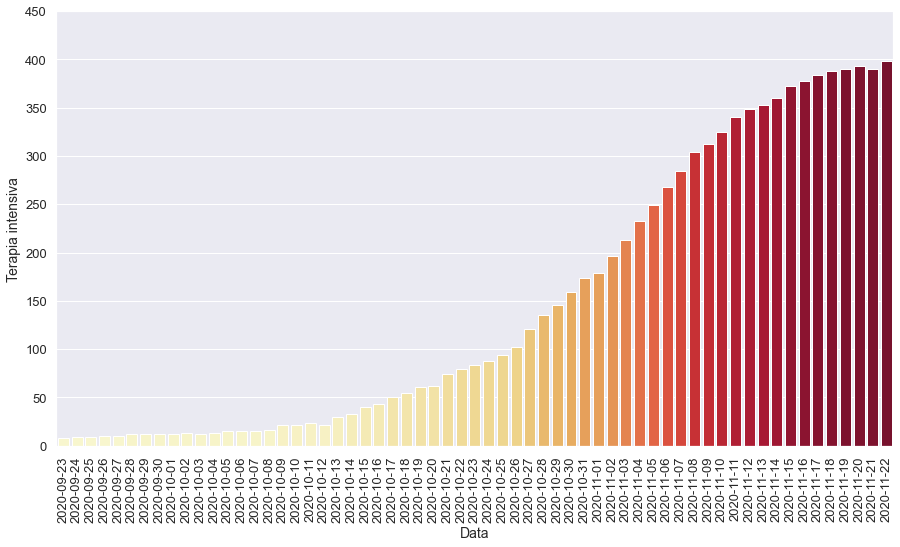

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

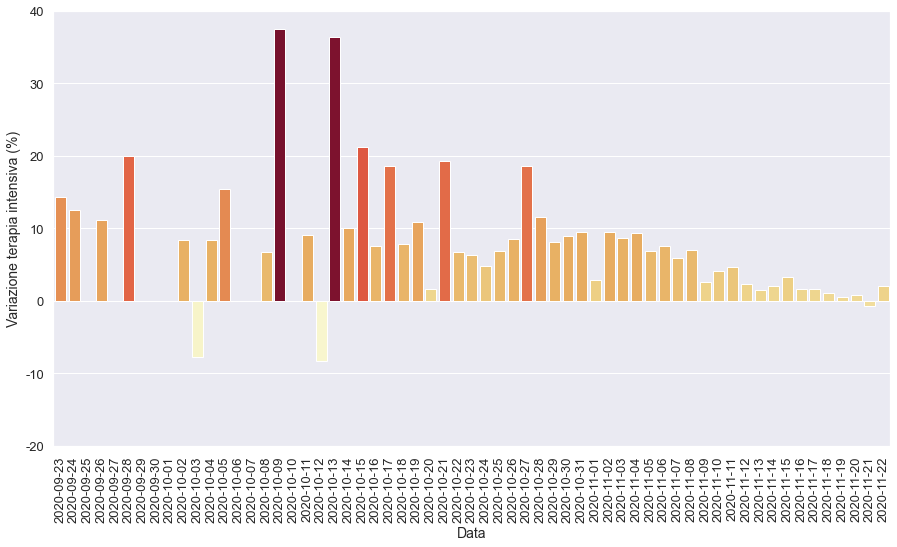

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

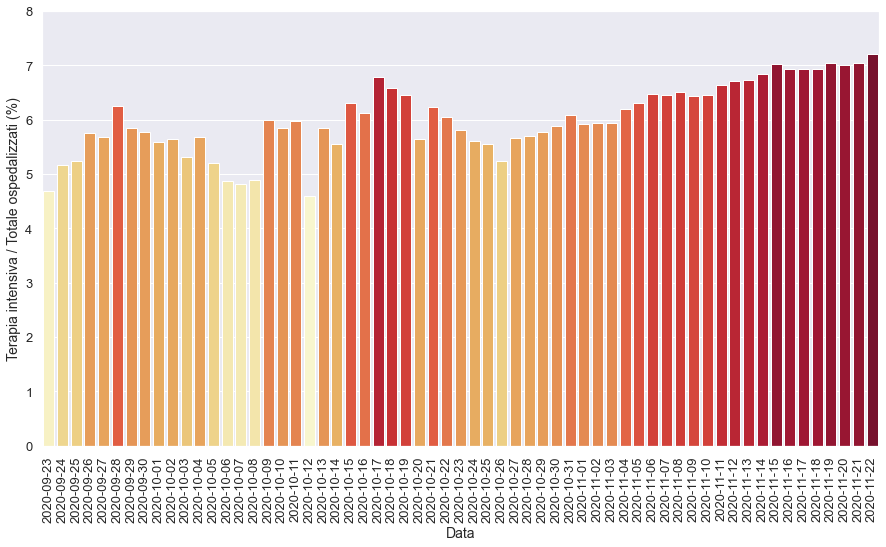

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

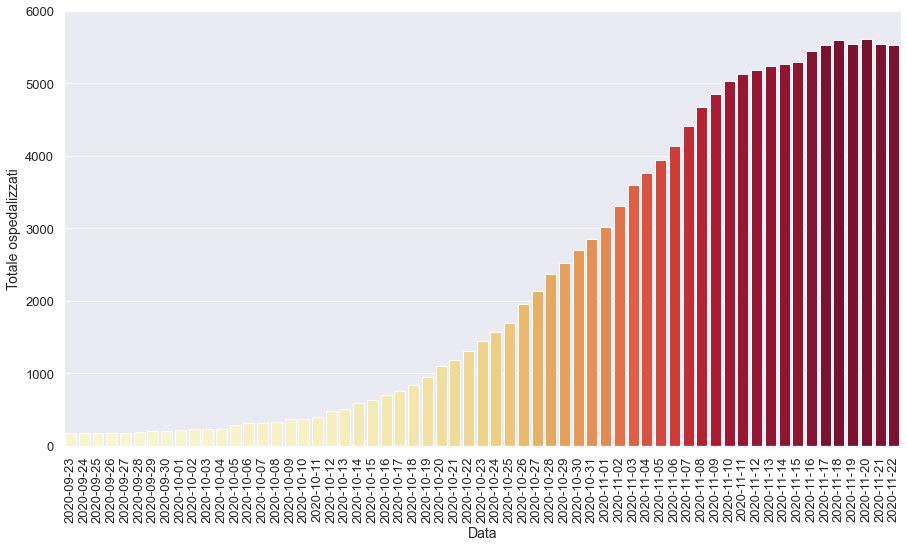

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

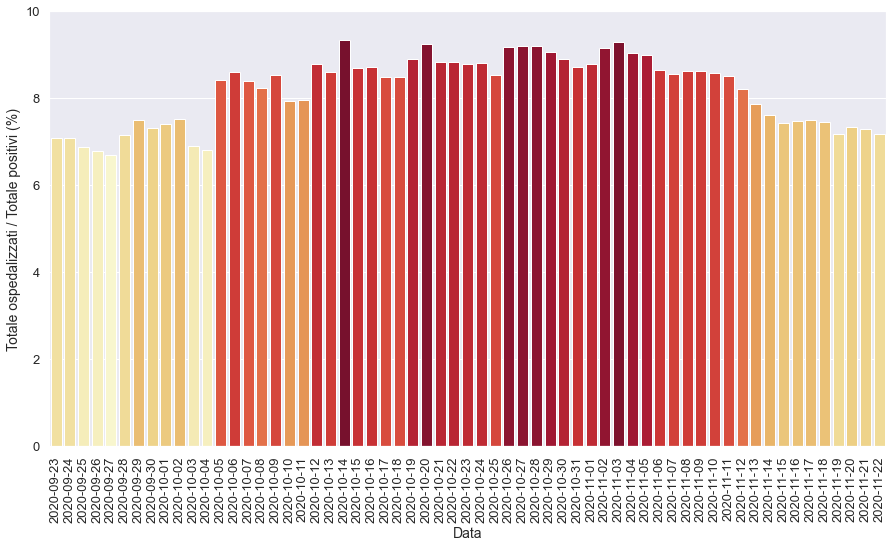

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

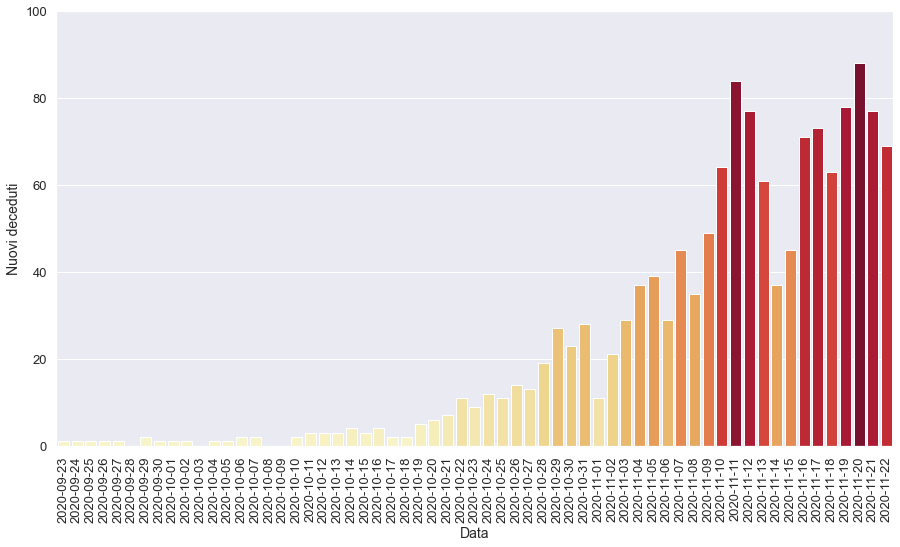

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

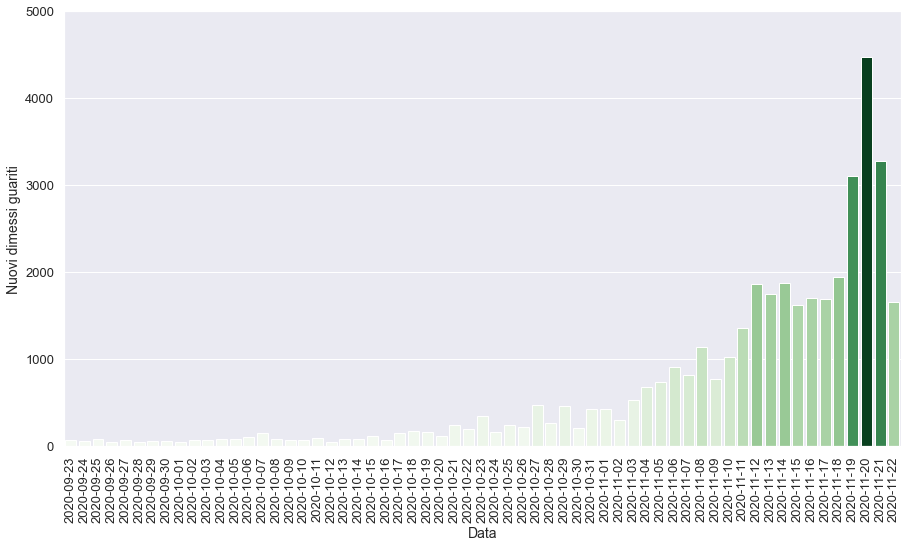

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-23T17:00:00,1,Piemonte,1362,84,1446,15016,16462,1682,2032,...,9.0,12665.0,9702.0,1541.0,5.81,8.78,16.04,20.94,6.33,13.748
1,2020-10-24T17:00:00,1,Piemonte,1483,88,1571,16272,17843,1381,1548,...,12.0,11847.0,8957.0,1256.0,5.60,8.80,13.07,17.28,4.76,9.403
2,2020-10-25T17:00:00,1,Piemonte,1601,94,1695,18182,19877,2034,2287,...,11.0,12657.0,10675.0,1910.0,5.55,8.53,18.07,21.42,6.82,12.817
3,2020-10-26T17:00:00,1,Piemonte,1849,102,1951,19316,21267,1390,1625,...,14.0,11367.0,7709.0,1134.0,5.23,9.17,14.30,21.08,8.51,8.175
4,2020-10-27T17:00:00,1,Piemonte,2016,121,2137,21103,23240,1973,2458,...,13.0,12547.0,10793.0,1787.0,5.66,9.20,19.59,22.77,18.63,11.558
5,2020-10-28T17:00:00,1,Piemonte,2237,135,2372,23415,25787,2547,2827,...,19.0,16673.0,13926.0,2312.0,5.69,9.20,16.96,20.30,11.57,12.164
6,2020-10-29T17:00:00,1,Piemonte,2381,146,2527,25364,27891,2104,2585,...,27.0,12787.0,10701.0,1949.0,5.78,9.06,20.22,24.16,8.15,10.024
7,2020-10-30T17:00:00,1,Piemonte,2547,159,2706,27682,30388,2497,2719,...,23.0,15977.0,13604.0,2318.0,5.88,8.90,17.02,19.99,8.90,9.749
8,2020-10-31T17:00:00,1,Piemonte,2683,174,2857,29967,32824,2436,2887,...,28.0,15575.0,12779.0,2285.0,6.09,8.70,18.54,22.59,9.43,9.500
9,2020-11-01T17:00:00,1,Piemonte,2844,179,3023,31391,34414,1590,2024,...,11.0,10249.0,7521.0,1424.0,5.92,8.78,19.75,26.91,2.87,6.166


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

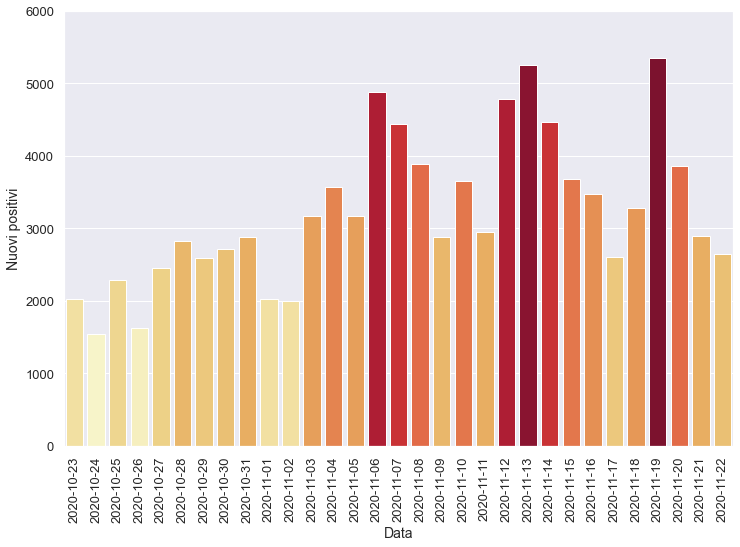

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

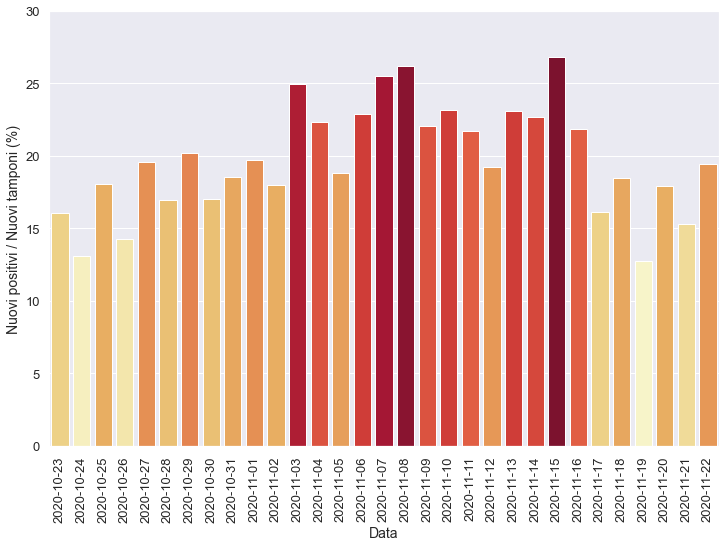

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

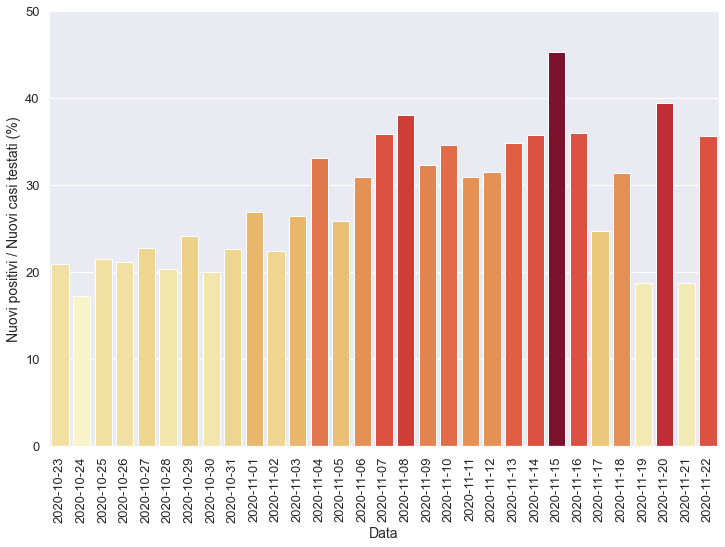

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

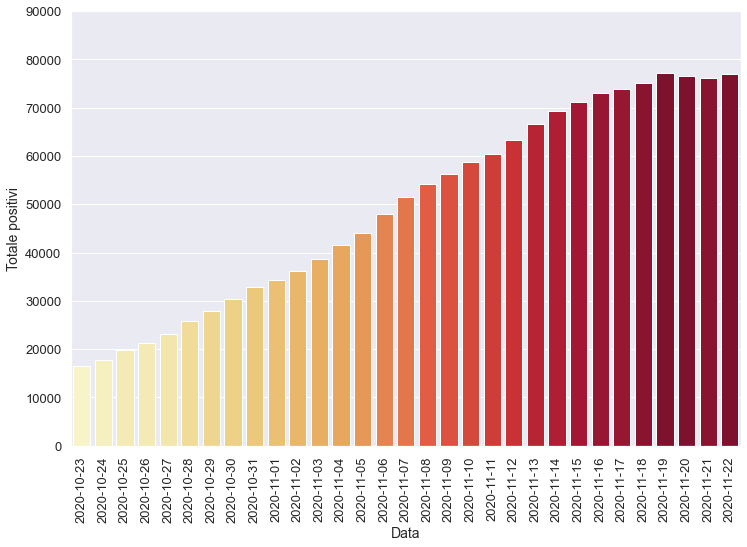

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

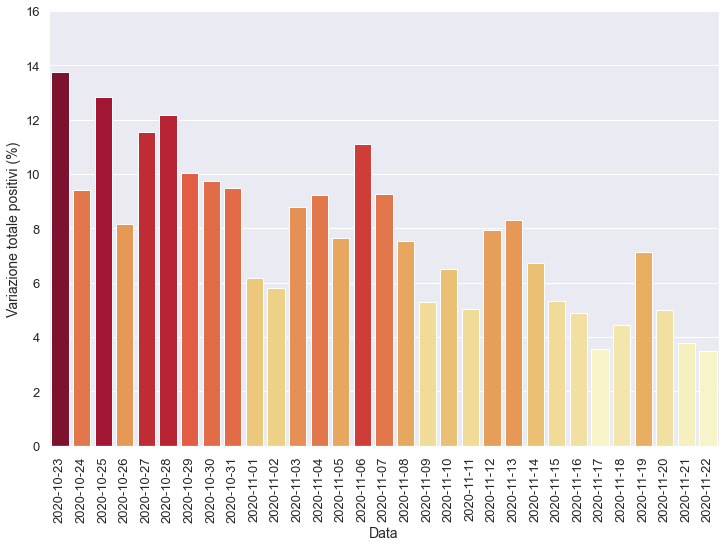

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

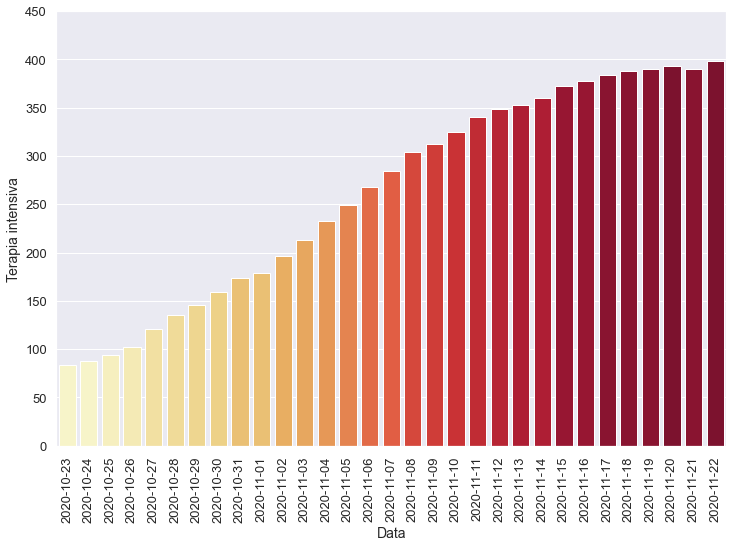

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

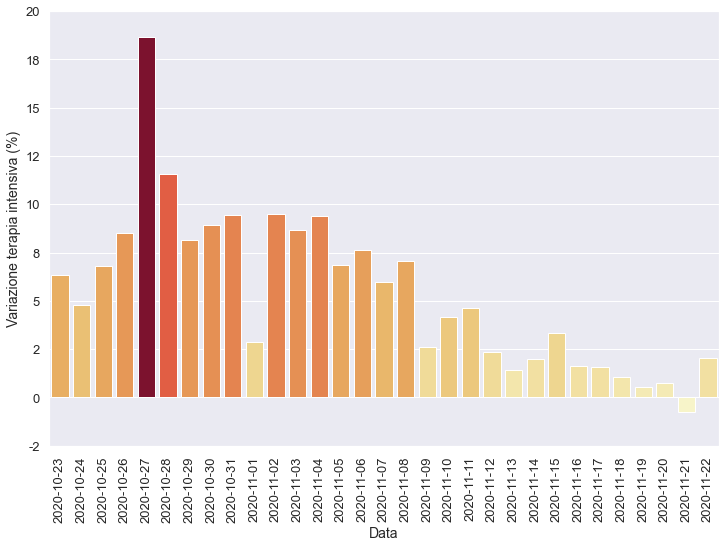

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

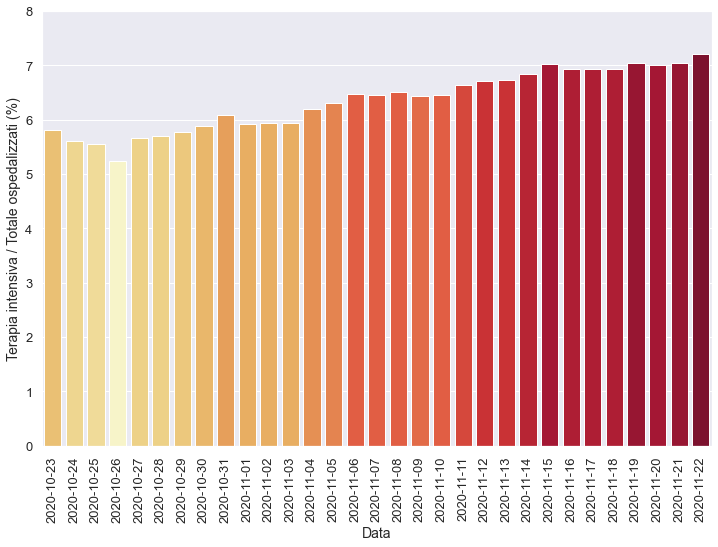

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

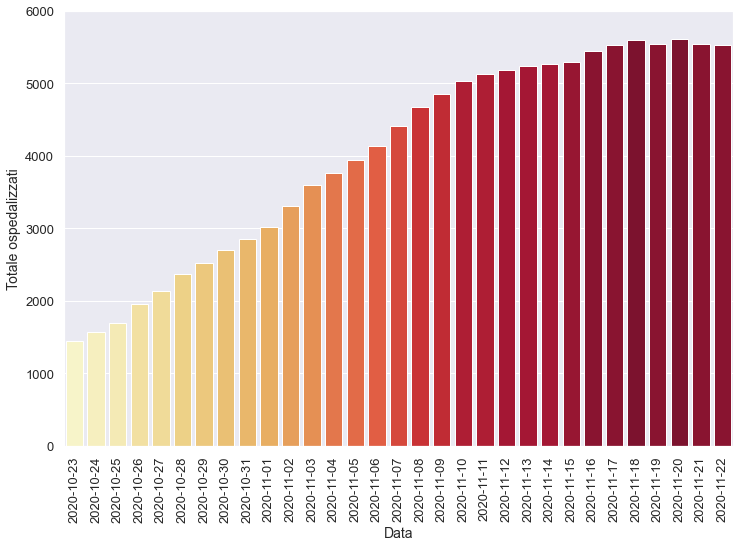

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

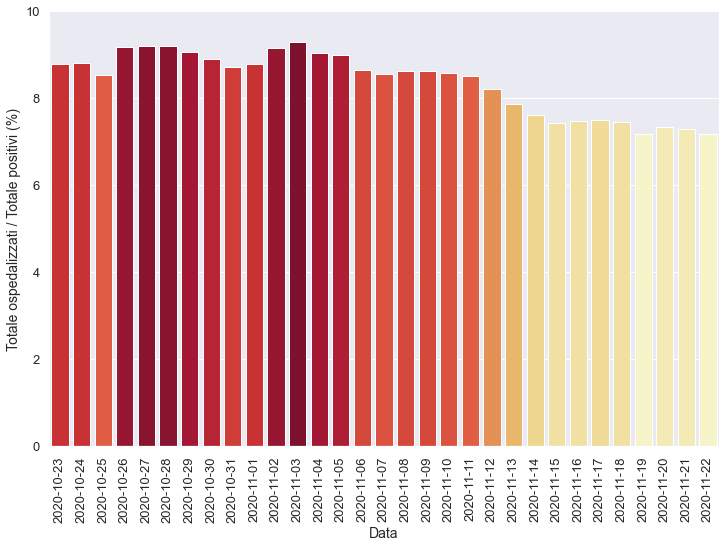

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

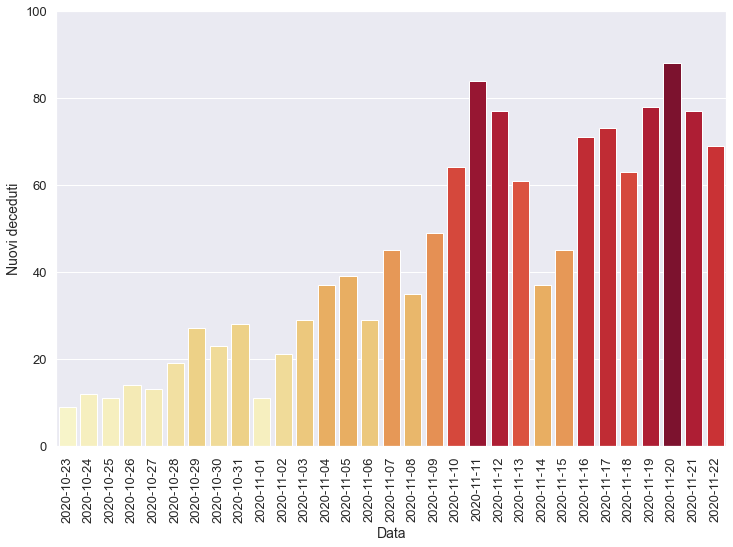

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

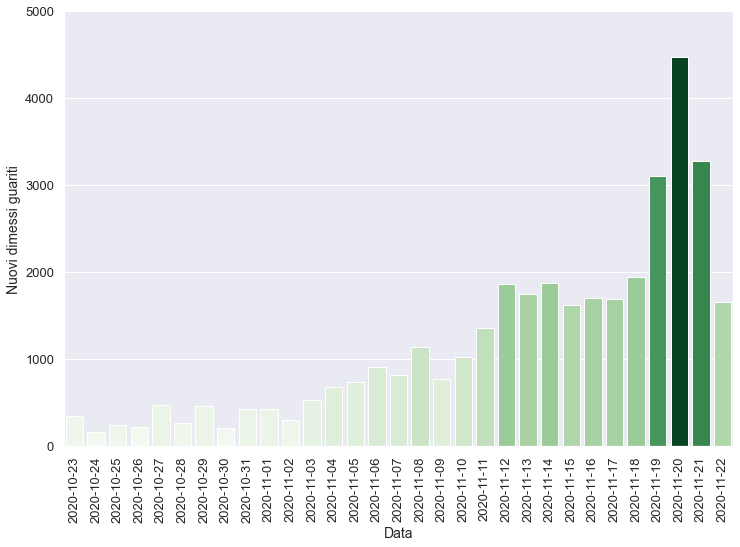

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-15T17:00:00,1,Piemonte,4921,372,5293,65936,71229,2014,3682,...,45.0,13712.0,8127.0,1983.0,7.03,7.43,26.85,45.31,3.33,5.320
1,2020-11-16T17:00:00,1,Piemonte,5074,378,5452,67488,72940,1711,3476,...,71.0,15902.0,9654.0,1552.0,6.93,7.47,21.86,36.01,1.61,4.880
2,2020-11-17T17:00:00,1,Piemonte,5150,384,5534,68252,73786,846,2606,...,73.0,16131.0,10574.0,764.0,6.94,7.50,16.16,24.65,1.59,3.573
3,2020-11-18T17:00:00,1,Piemonte,5208,388,5596,69468,75064,1278,3281,...,63.0,17755.0,10445.0,1216.0,6.93,7.45,18.48,31.41,1.04,4.447
4,2020-11-19T17:00:00,1,Piemonte,5147,390,5537,71700,77237,2173,5349,...,78.0,41876.0,28547.0,2232.0,7.04,7.17,12.77,18.74,0.52,7.126
5,2020-11-20T17:00:00,1,Piemonte,5225,393,5618,70927,76545,-692,3861,...,88.0,21513.0,9801.0,-773.0,7.00,7.34,17.95,39.39,0.77,4.999
6,2020-11-21T17:00:00,1,Piemonte,5150,390,5540,70552,76092,-453,2896,...,77.0,18889.0,15496.0,-375.0,7.04,7.28,15.33,18.69,-0.76,3.783
7,2020-11-22T17:00:00,1,Piemonte,5132,398,5530,71482,77012,920,2641,...,69.0,13605.0,7410.0,930.0,7.20,7.18,19.41,35.64,2.05,3.471


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

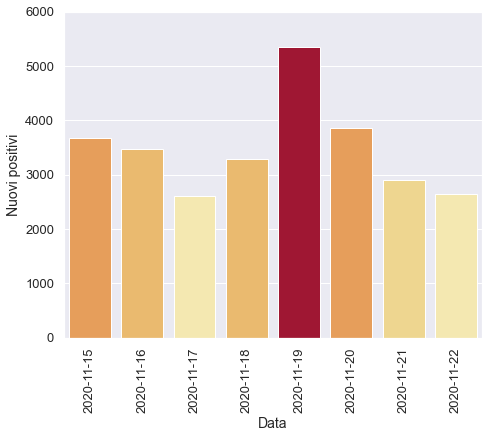

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

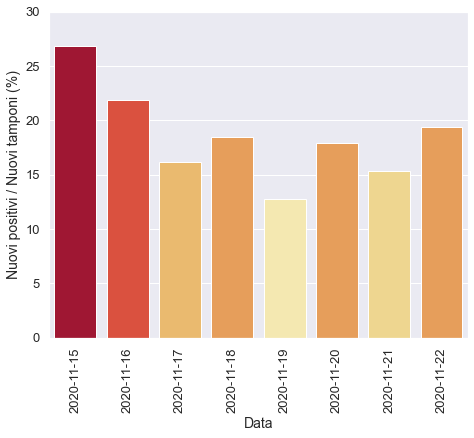

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

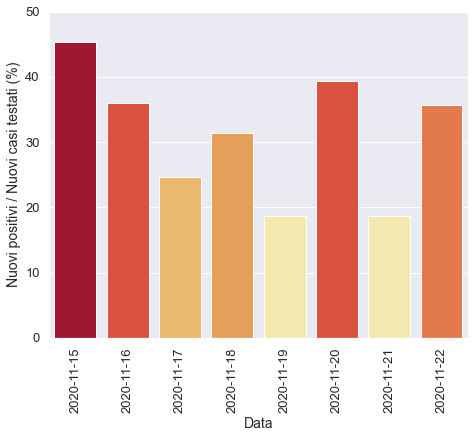

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

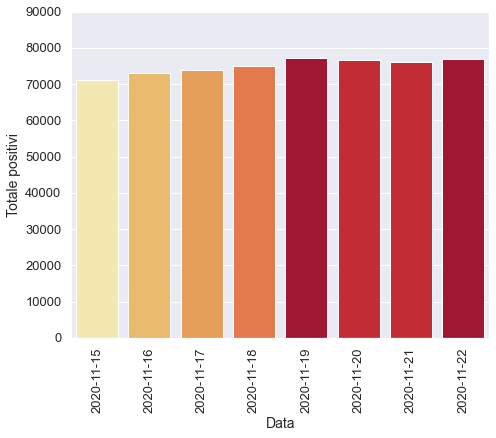

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

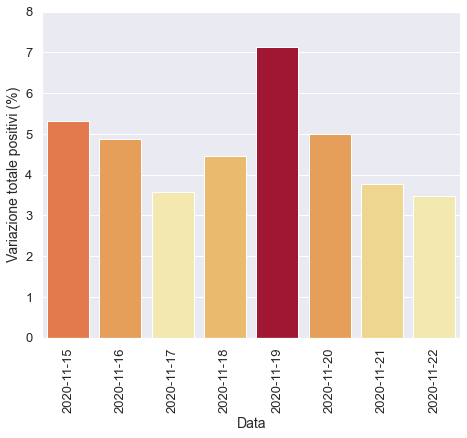

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

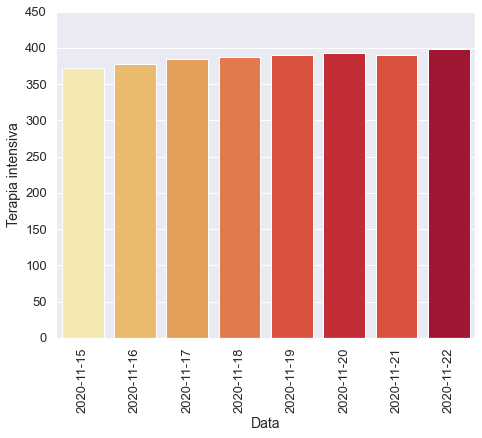

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

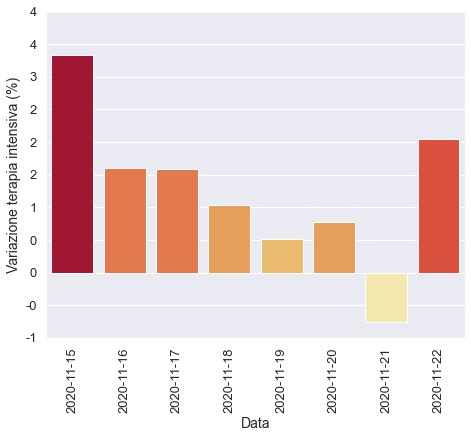

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

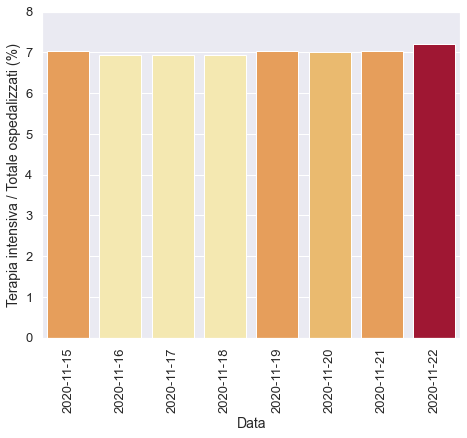

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

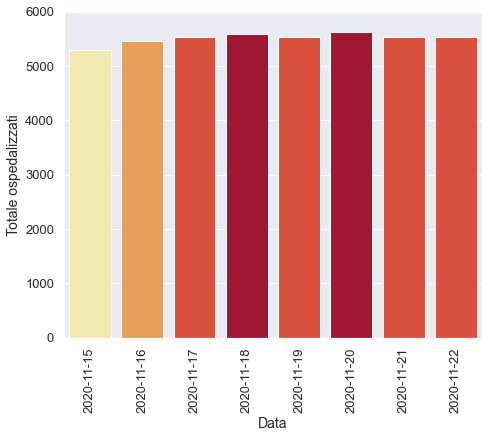

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

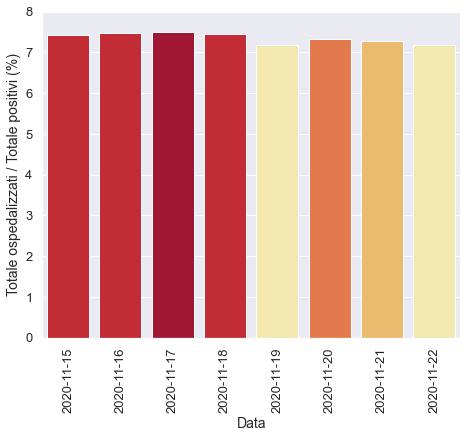

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

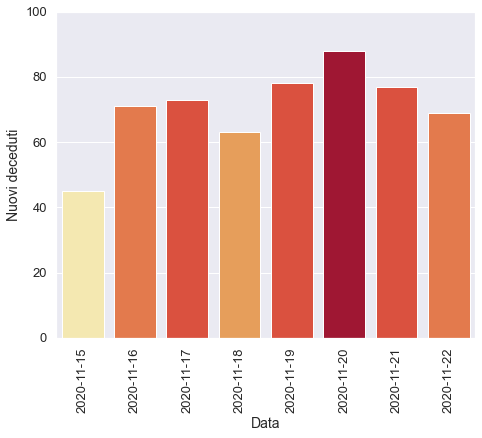

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

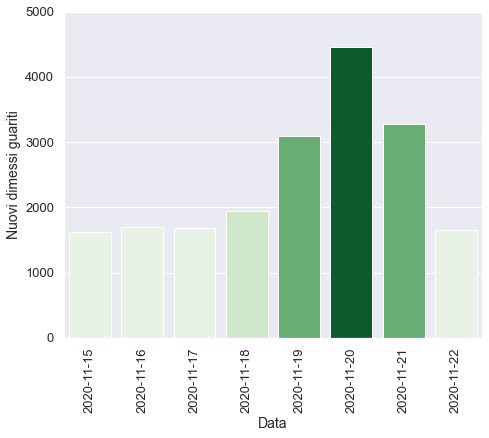

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)